<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/02_ML_Classification01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02_ ML exercise

This is a report for EDA. Amazing !! 
It gave me some errors and I finally was directed to :
https://stackoverflow.com/questions/67652254/getting-an-error-while-working-on-pandas-profiling-on-jupyter


As restart is required I move to the very first rows of execution before to load data and libraries.

In [ ]:
!pip uninstall -y pandas-profiling

In [3]:
pip install pandas-profiling

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
# install dependences
!sudo apt-get install build-essential swig
# install autosklearn
!pip install auto-sklearn

In [5]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.6 MB/s eta 0:00:00


In [6]:
# TODO: REVISAR LAS LIBRERIAS 

#import library
import matplotlib as mpl
import seaborn as sns
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #LinearRegression , Ridge, Lasso, ElasticNet
from sklearn import metrics #Seen in other tutorial (instead of using only mean_squared_error, r2_score )
#from sklearn.metrics import mean_squared_error, r2_score
from bokeh.plotting import figure
from bokeh.io import output_file,show
from sklearn.preprocessing import StandardScaler  
import hvplot.pandas
from sklearn.metrics import confusion_matrix           

In [7]:
# upload files from your local machine
from google.colab import files
files.upload() 
dataset = pd.read_csv("ai4i2020.csv")   

Saving ai4i2020.csv to ai4i2020.csv


In [8]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [9]:
dataset.info() #We don't have any null or NaN numbers.
#See better in below report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [10]:
#Deprecated for report
# hvplot.extension('bokeh')
# hvexplorer = hvplot.explorer(dataset, 
#                              width=1000, height=600,
#                              x='UDI', y_multi=['Air temperature [K]'],
#                              )
# hvexplorer

In [11]:
#Deprecated for new report
#dataset.describe(include="all").T

In [12]:
#NULLS?
# print(pd.isnull(dataset).sum(),'\n\n')

# print(pd.isna(dataset).sum())

In [13]:
# He visto esta librería y tiene buena pinta para hacer reportes que ayuden en EDA
# https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

from pandas_profiling import ProfileReport 

profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Correlation Graphic')

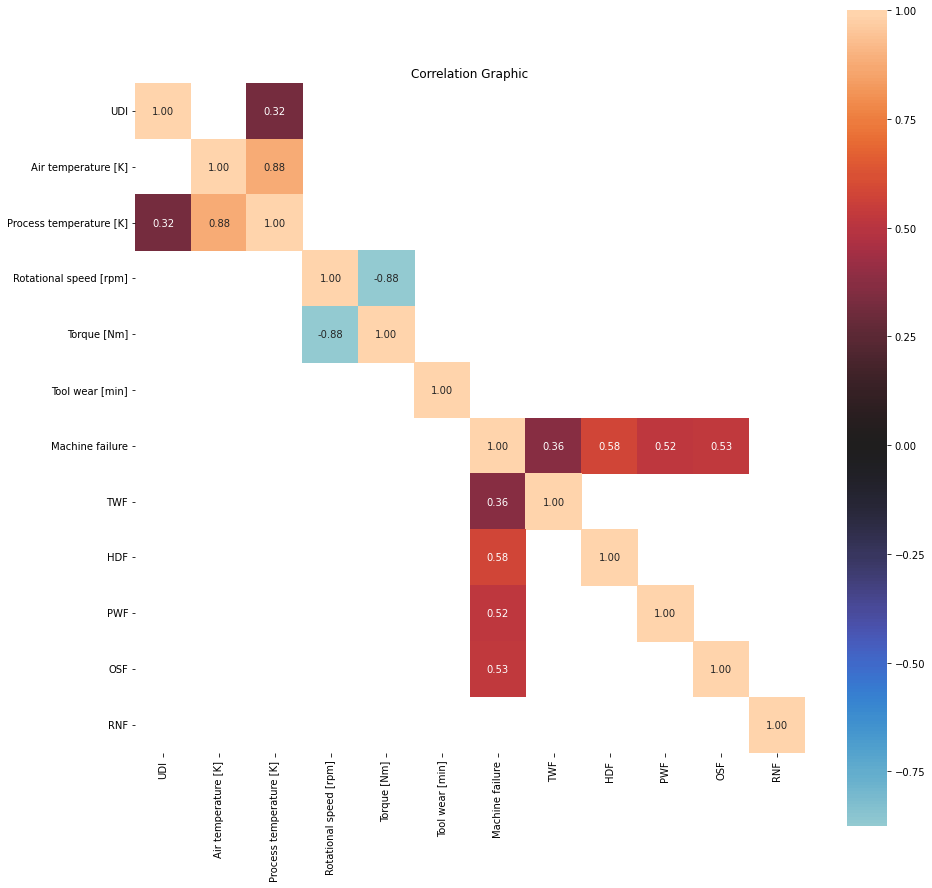

In [14]:
#https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html

# I prefer this correlation plot. As notice I will filter by high correlations variables (with numbers)

limit= 0.3
matrix=dataset.corr()
mask=matrix.where((abs(matrix) >= limit)).isna() 
plt.figure(figsize=(15,15))

sns.heatmap(matrix, 
              center=0,
              square=True,
              annot=True, 
              mask=mask,
              fmt='.2f')

plt.title("Correlation Graphic")

In [15]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

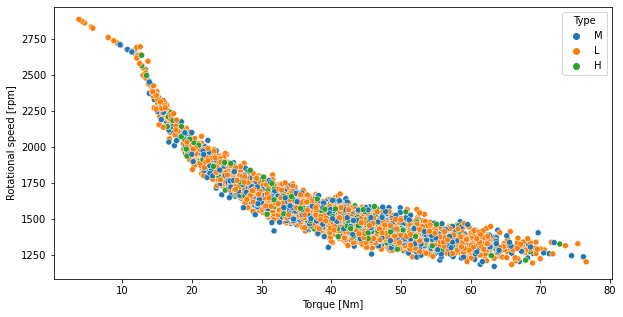

In [16]:
# Review max interaction scores
plt.figure(figsize=(10,5))
sns.scatterplot(data=dataset, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type")

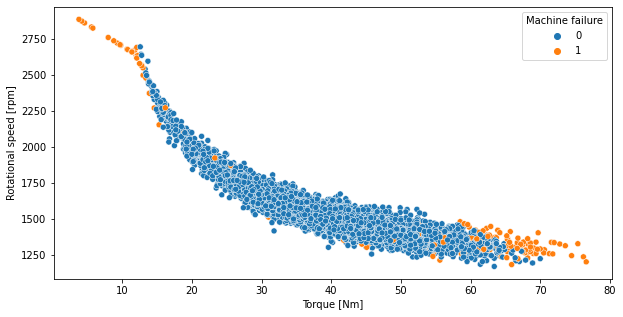

In [17]:
# Review max interaction scores
plt.figure(figsize=(10,5))
sns.scatterplot(data=dataset, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Machine failure")

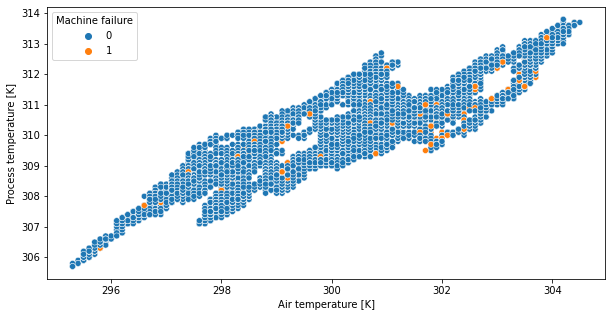

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dataset, x="Air temperature [K]", y="Process temperature [K]", hue="Machine failure")

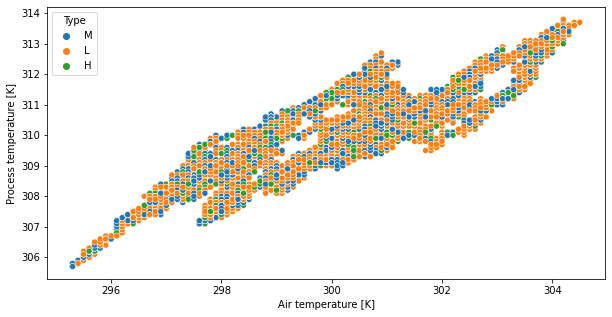

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dataset, x="Air temperature [K]", y="Process temperature [K]", hue="Type")

In [20]:
#ToDo: Delete this line
#Reset dataset as I am destroying and creating columns.
dataset = pd.read_csv("ai4i2020.csv")   

In [21]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [22]:
dictionary={'L':1,
            'M':2,
            'H':3,
                 }
dataset['Type_num']=dataset.Type.map(dictionary)

In [23]:
list(dataset)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'Type_num']

In [24]:
dataset.drop(['UDI','Product ID','Type'],axis=1,inplace=True)

#Let's start with Logistic Regression using Failure/Non failure

In [25]:
dataset.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True) #Prepare dataset before segregate X and y

In [26]:
X,y = dataset.drop(columns='Machine failure', axis=1) , dataset['Machine failure']
print(X.shape)
print(y.shape)

(10000, 6)
(10000,)


In [27]:
#Split data into training/testing
#Done above: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
print(X_test.shape,'\n\n') #2500 rows.
print(X_train.shape) #7500 rows.


(2500, 6) 


(7500, 6)


In [29]:
print(y_test.value_counts(),'\n') # 88 failures in the test data set
print(y_train.value_counts()) # 251 failures in the test data set

0    2412
1      88
Name: Machine failure, dtype: int64 

0    7249
1     251
Name: Machine failure, dtype: int64


In [30]:
#Done above from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()  #Instantiate the object

X_train_sc = sc_X.fit_transform(X_train)        #DATA for TRAINING: fit the model and transform   
X_test_sc = sc_X.transform(X_test)              #DATA for TESTING:  transform

np.set_printoptions(formatter=None) #Sidenote: These options determine the way floating point numbers, arrays and other NumPy objects are displayed. If not None, the keys should indicate the type(s) that the respective formatting function applies to.

print(X_train_sc,'\n\n')  #printing X_variables
print(X_test_sc) 

[[ 0.30123997 -0.40349782 -0.9497317   1.16698314 -0.56033783 -0.74772087]
 [-1.19406079 -0.80559278  0.80423788 -0.83807363 -0.43496251  0.74255459]
 [ 0.99904699  0.60173957  0.69252007 -0.84809891 -0.40361868 -0.74772087]
 ...
 [ 0.65014348  0.06561296 -0.46934513  0.41508685  1.27327623  2.23283005]
 [-0.84515728 -0.6045453  -0.6592654   0.74592122 -1.1558706  -0.74772087]
 [-0.14735026 -0.53752947 -1.07820718  1.7484496   0.48968048 -0.74772087]] 


[[-1.14421743 -1.20768773 -1.14523787  1.30733711  0.77177495 -0.74772087]
 [-2.19092797 -2.54800425 -0.51961814  0.99655332  0.4113209  -0.74772087]
 [-0.39656705 -1.00664025 -0.27383897  0.3248593   0.80311878 -0.74772087]
 ...
 [-0.44641041 -0.73857695  0.78748021 -1.27918612  0.05086686 -0.74772087]
 [-1.69249438 -1.74381434 -0.1956365   0.58551668 -0.76407272 -0.74772087]
 [ 0.84951691  0.53472374  0.73720719 -0.83807363  0.47400856  0.74255459]]


In [31]:
logReg = LogisticRegression(random_state=0)     
logReg.fit(X_train_sc, y_train)  

LogisticRegression(random_state=0)

Predicting the Test Ds

In [32]:
y_pred_lr  = logReg.predict(X_test_sc)

In [33]:
#Done above from sklearn.metrics import confusion_matrix           
cm = confusion_matrix(y_test, y_pred_lr) 
print (cm)

[[2405    7]
 [  74   14]]


# K_Nearest_Neighbors (K-NN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier       
classifierK_NN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)   
classifierK_NN.fit(X_train_sc, y_train)   

KNeighborsClassifier()

In [35]:
y_pred_K_NN  = classifierK_NN.predict(X_test_sc) 
print(y_pred_K_NN,'\n')
print(y_test)

[0 0 0 ... 0 0 0] 

9394    0
898     0
2398    0
5906    0
2343    0
       ..
8764    0
4359    0
2041    0
1108    0
3332    0
Name: Machine failure, Length: 2500, dtype: int64


In [36]:
cm = confusion_matrix(y_test, y_pred_K_NN) 
print (cm)

[[2405    7]
 [  59   29]]


# Support Vector Machine for Classification (SVC)

In [37]:
# Create a SVC object
from sklearn.svm import SVC                             
#classifierSVC = SVC(kernel = "linear", probability=True, random_state = 0) ## Separación lineal  
classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0) ## Separación no lineal
classifierSVC.fit(X_train_sc, y_train)   

SVC(probability=True, random_state=0)

In [38]:
y_pred_SVC  = classifierSVC.predict(X_test_sc) 

In [39]:
cm = confusion_matrix(y_test, y_pred_SVC) 
print (cm)

[[2409    3]
 [  63   25]]


# Naive Bayes Model

In [40]:
from sklearn.naive_bayes import GaussianNB                            
classifierNaiveBayes = GaussianNB()                              
classifierNaiveBayes.fit(X_train_sc, y_train)   

GaussianNB()

In [41]:
y_pred_NaiveBayes  = classifierNaiveBayes.predict(X_test_sc) 

In [42]:
cm = confusion_matrix(y_test, y_pred_NaiveBayes) 
print (cm)

[[2386   26]
 [  70   18]]


#Decision Tree for Classification

In [43]:
# Create a DTC object
from sklearn.tree import DecisionTreeClassifier                           
classifierTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)   
classifierTree.fit(X_train_sc, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
y_pred_classifierTree  = classifierTree.predict(X_test_sc) 

In [45]:
cm = confusion_matrix(y_test, y_pred_classifierTree) 
print (cm)

[[2385   27]
 [  31   57]]


#Random Forests for Classification

In [54]:
# Create a CRF object
from sklearn.ensemble import RandomForestClassifier                           
classifierRandomForest = RandomForestClassifier(n_estimators = 50, criterion = "entropy", random_state = 0)   
classifierRandomForest.fit(X_train_sc, y_train)      

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [55]:
y_pred_classifierRandomForest  = classifierRandomForest.predict(X_test_sc) 

In [56]:
cm = confusion_matrix(y_test, y_pred_classifierRandomForest) 
print (cm)

[[2404    8]
 [  34   54]]


# Metrics



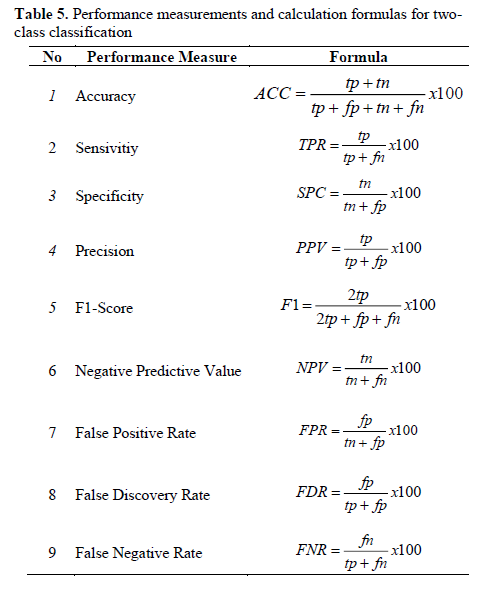

Accuracy - How many total hits have been detected (tp+tn)
This is not a good metric for this non-balance dataset. 

Recall or Sensitivity will be a better metric to assure this unbalance dataset as we would like to assure positive are correctly hit. And this will be no the case....


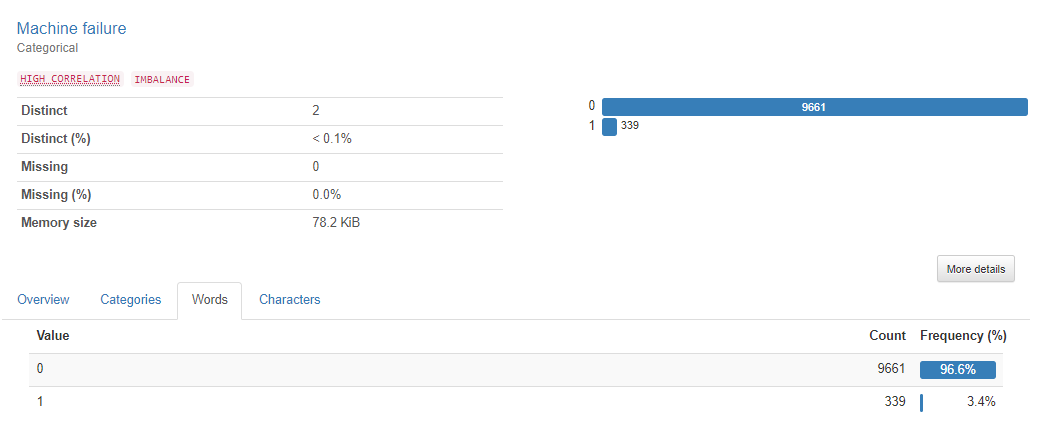

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:

# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX. (Logistic Regression): " )
print( confusion_matrix(y_test, y_pred_lr) )
print(" ")
print("CONF. MATRX.  (K_Nearest_Neighbors): ")
print( confusion_matrix(y_test, y_pred_K_NN) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Naive Bayes): "  )
print( confusion_matrix(y_test, y_pred_NaiveBayes) )
print(" ")
print("CONF. MATRX.  (Classification Decision Tree): " )
print( confusion_matrix(y_test, y_pred_classifierTree) )
print(" ")
print("CONF. MATRX.  (Classification Random Forests): " )
print( confusion_matrix(y_test, y_pred_classifierRandomForest) )
print(" ")
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Logistic Regression): %.2f" % accuracy_score(y_test, y_pred_lr) )
print("   ACC (K_Nearest_Neighbors): %.2f" % accuracy_score(y_test, y_pred_K_NN) )
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Naive Bayes): %.2f" % accuracy_score(y_test, y_pred_NaiveBayes) )
print("   ACC (Classification Decision Tree): %.2f" % accuracy_score(y_test, y_pred_classifierTree) )
print("   ACC (Classification Random Forests): %.2f" % accuracy_score(y_test, y_pred_classifierRandomForest) )
print(" ")

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")
print("CLASS_REPORT (Logistic Regression): " )
print( classification_report(y_test, y_pred_lr) )
print(" ")
print("CLASS_REPORT (K_Nearest_Neighbors): ")
print( classification_report(y_test, y_pred_K_NN) )
print(" ")
print("CLASS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLASS_REPORT (Naive Bayes): "  )
print( classification_report(y_test, y_pred_NaiveBayes) )
print(" ")
print("CLASS_REPORT (Classification Decision Tree): " )
print( classification_report(y_test, y_pred_classifierTree) )
print(" ")
print("CLASS_REPORT (Classification Random Forests): " )
print( classification_report(y_test, y_pred_classifierRandomForest) )
print(" ")

CONFUSION MATRIX
CONF. MATRX. (Logistic Regression): 
[[2405    7]
 [  74   14]]
 
CONF. MATRX.  (K_Nearest_Neighbors): 
[[2405    7]
 [  59   29]]
 
CONF. MATRX.  (Support Vector Machine SVC): 
[[2409    3]
 [  63   25]]
 
CONF. MATRX.  (Naive Bayes): 
[[2386   26]
 [  70   18]]
 
CONF. MATRX.  (Classification Decision Tree): 
[[2385   27]
 [  31   57]]
 
CONF. MATRX.  (Classification Random Forests): 
[[2404    8]
 [  34   54]]
 
 
ACCURACY
   ACC (Logistic Regression): 0.97
   ACC (K_Nearest_Neighbors): 0.97
   ACC (Support Vector Machine SVC): 0.97
   ACC (Naive Bayes): 0.96
   ACC (Classification Decision Tree): 0.98
   ACC (Classification Random Forests): 0.98
 
CLASSIFICATION_REPORT
CLASS_REPORT (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2412
           1       0.67      0.16      0.26        88

    accuracy                           0.97      2500
   macro avg       0.82      0.58      0.62   

# ROC and AUC

In [66]:
 y_prob_logisregression  = logReg.predict_proba(X_test_sc)
 print(y_prob_logisregression.shape,'\n')
 print(y_prob_logisregression)

(2500, 2) 

[[0.96444977 0.03555023]
 [0.96566532 0.03433468]
 [0.96017861 0.03982139]
 ...
 [0.99826994 0.00173006]
 [0.99252365 0.00747635]
 [0.99055025 0.00944975]]


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

PARAMETERS:

-y_true ... y_test in our case

-y_score (target scores, can either be probability estimates of the positive class or [...] ). For this purpose we will use probability calculated through 'proba' method [ Prob_neg     Prob_Positive)


RETURNS:

fpr: Increasing FP rates...

tpr: Increasing true positive rates 

thresholds: decreasing thresholds on the decision function 

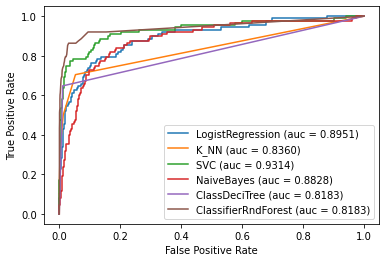

In [72]:
from sklearn.metrics import roc_curve, auc

# 1-logisregression
y_prob_logisregression  = logReg.predict_proba(X_test_sc) #Return probability estimates
logisregression_fpr, logisregression_tpr, threshold = roc_curve(y_test, y_prob_logisregression[:, 1])
auc_logisregressions = auc(logisregression_fpr, logisregression_tpr)  #not plotted... used for labeling
plt.plot(logisregression_fpr, logisregression_tpr, linestyle='-', label='LogistRegression (auc = %0.4f)' % auc_logisregressions)

# 2-K_Nearest_Neighbors
y_prob_KNN  = classifierK_NN.predict_proba(X_test_sc)  
KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, y_prob_KNN[:, 1])
auc_KNN = auc(KNN_fpr, KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='K_NN (auc = %0.4f)' % auc_KNN)

# 3-Support Vector Classification
y_prob_SVC  = classifierSVC.predict_proba(X_test_sc)  
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)

# 4-NaiveBayes
y_prob_NaiveBayes  = classifierNaiveBayes.predict_proba(X_test_sc)  
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_prob_NaiveBayes[:, 1])
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr, linestyle='-', label='NaiveBayes (auc = %0.4f)' % auc_NaiveBayes)

# 5-Decision Tree for Classification
y_prob_classifierTree  = classifierTree.predict_proba(X_test_sc)  
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test, y_prob_classifierTree[:, 1])
auc_classifierTree = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTree)

# 6-Decision Random Forests for Classification
y_prob_classifierRndForest  = classifierRandomForest.predict_proba(X_test_sc)  
classifierRndForest_fpr, classifierRndForest_tpr, threshold = roc_curve(y_test, y_prob_classifierRndForest[:, 1])
auc_classifierRndForest = auc(classifierRndForest_fpr, classifierRndForest_tpr)
plt.plot(classifierRndForest_fpr, classifierRndForest_tpr, linestyle='-', label='ClassifierRndForest (auc = %0.4f)' % auc_classifierTree)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()  